In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scapy import *
from sources import *
import seaborn as sns
sns.set(style="whitegrid")

In [66]:
data_path = '../data/network_1/captures2.pcap'
sniffed_packets = sniff(offline=data_path)


* Lugar: red de oficina
* Horario: 16:27 - 16:43
* Duración: 16 minutos
* Tecnologia WI-FI
* Herramienta de captura: wireshark
* Paquetes capturados: 26085




# Modelado y Analisis de la Fuente S1

**Modelo**

Sean $ p_1, .., p_n $ las tramas de capa 2 que se capturan en una red local. Se pueden modelar las tramas capturadas como una fuente de información de memoria nula $ S_1 = \{ s_1 , s_2 , ..., s_q \} $, donde cada si está formado por la combinación entre el tipo de destino de la trama (unicast o broadcast) y el protocolo de la capa inmediata superior encapsulado en la misma. 
    
    


In [67]:
S1 = create_S1_source(sniffed_packets)

### Información por simbolo y Entropia de la Fuente

In [68]:
def entropy(source):
    """Devuelve entropía de 'source' (float)."""
    infos = informacion_por_simbolo(source)
    probas = proba_por_simbolo(source)
    # Esto funciona porque los símbolos en infos y probas están en el mismo orden
    return sum(np.array(list(infos.values())) * np.array(list(probas.values())))

entropia_S1 = entropy(S1)
entropia_maxima_S1 = max_entropy(S1)

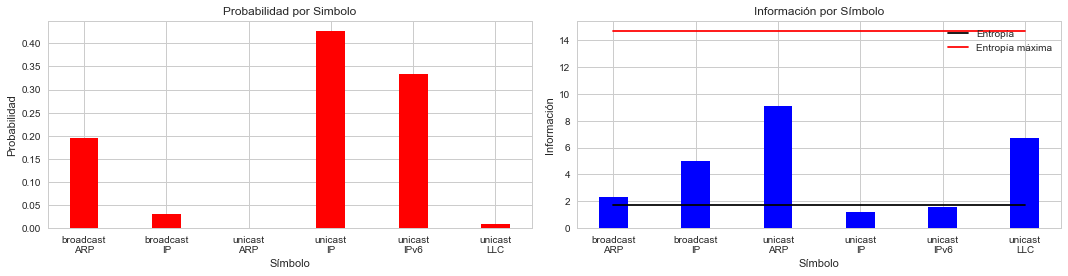

In [69]:
proba = proba_por_simbolo(S1)
fig, axarr = plt.subplots(1,2, figsize=(15, 4))
bar_width = 0.35
index, values = map(list, zip(*proba.items()))
axarr[0].bar(index, values, bar_width, color='r')
axarr[0].set_xlabel('Símbolo')
axarr[0].set_ylabel('Probabilidad')
axarr[0].set_title('Probabilidad por Simbolo')


fig.tight_layout()

informacion = informacion_por_simbolo(S1)
bar_width = 0.35
index, values = map(list, zip(*informacion.items()))
axarr[1].bar(index, values, bar_width, color='b')
axarr[1].set_xlabel('Símbolo')
axarr[1].set_ylabel('Información')
axarr[1].set_title('Información por Símbolo')
axarr[1].plot(range(6), [entropia_S1]*6, color='k', label='Entropía')
axarr[1].plot(range(6), [entropia_maxima_S1]*6, color='r', label='Entropía máxima')
axarr[1].legend(loc="upper right")
fig.tight_layout()
plt.show()

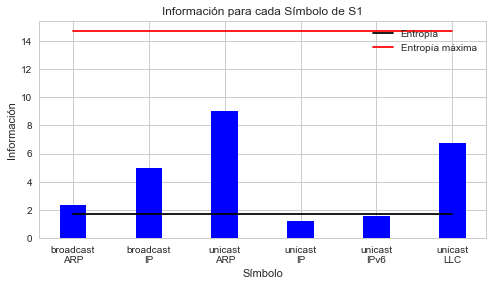

{'broadcast\nIP': 0.03105232892466935, 'unicast\nIP': 0.4272187080697719, 'unicast\nIPv6': 0.3341767299214108, 'broadcast\nARP': 0.19631972397929845, 'unicast\nLLC': 0.00935403488594978, 'unicast\nARP': 0.0018784742188997507}


In [70]:
proba = proba_por_simbolo(S1)
f, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.35
informacion = informacion_por_simbolo(S1)
bar_width = 0.35
index, values = map(list, zip(*informacion.items()))
ax.bar(index, values, bar_width, color='b')
ax.set_xlabel('Símbolo')
ax.set_ylabel('Información')
ax.set_title('Información para cada Símbolo de S1')
ax.plot(range(6), [entropia_S1]*6, color='k', label='Entropía')
ax.plot(range(6), [entropia_maxima_S1]*6, color='r', label='Entropía máxima')
ax.legend(loc="upper right")
fig.tight_layout()
plt.show()
print(proba_por_simbolo(S1))

[0.03105232892466935, 0.4272187080697719, 0.3341767299214108, 0.19631972397929845, 0.00935403488594978, 0.0018784742188997507]


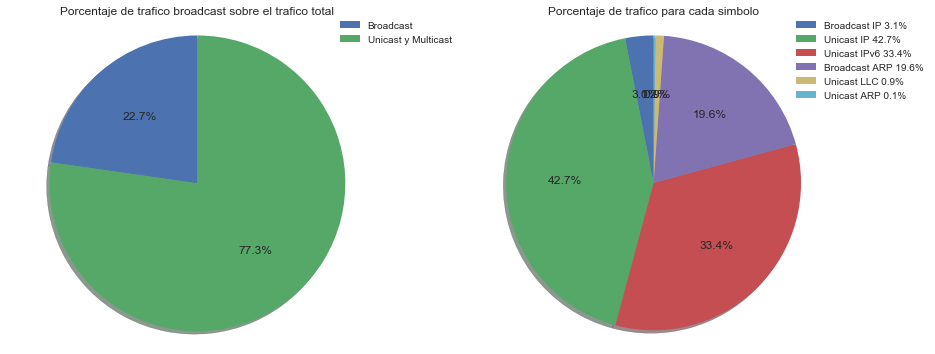

In [71]:
import matplotlib
fig1, axarr = plt.subplots(1, 2, figsize=(15, 6))


broadcast = sum([v for k, v in S1.items() if 'broadcast' in k])
unicast = sum([v for k, v in S1.items() if 'unicast' in k])
labels = 'Broadcast', 'Unicast y Multicast'
sizes = [broadcast, unicast]
axarr[0].pie(sizes,autopct='%1.1f%%',
        shadow=True, startangle=90)
axarr[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[0].set_title('Porcentaje de trafico broadcast sobre el trafico total')
handles = []
axarr[0].legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left")




labels, sizes = map(list, zip(*S1.items()))
labels = ['Broadcast IP 3.1%', 'Unicast IP 42.7%', 'Unicast IPv6 33.4%', 'Broadcast ARP 19.6%', 'Unicast LLC 0.9%', 'Unicast ARP 0.1%']
print([s / sum(sizes) for s in sizes])
axarr[1].pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
axarr[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[1].set_title('Porcentaje de trafico para cada simbolo')
axarr[1].legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left")

plt.show()

In [72]:
max_entropy(S1)

14.670932812915106

Observaciones:

Se puede obsevar que la cantidad de trafico broadcast sobre trafico total es representa aproximadamente 1/5 del trafico total. 

*Protocolos encontrados*
1. ARP o Address Resolution Protocol: es un protocolo de capa de enlace cuya funcion la direccion MAC correspondiente a una direccion IP
2. IP o Internet Protocol: es un protocolo de capa de red cuya funcion es enviar y transimir datos a travez de paquetes entre hosts.
3. LLC or Logical Link Control: 

De estos protocolos los protocolos IP son utilizados para transportar datos de usuarios mientras que los protocolos ARP y LLC son protocolos de control.

Encotramos que los simbolos < unicast, ARP> , < unicast, LLC> y <broadcast, IP> se pueden considerar como simbolos distinguidos ya que la cantiadad de informacion que proveen es significativamente mayor a las de los otros simbolos.

Para S1 la entropia de la fuente de 1.75, mientras que la entropia maxima que se podria llegar a aclanzar para esta fuente es de 14.67. Para esta red, el hecho de que sea considerablemente menor a la entropia maxima nos dice que la secuencia de paquetes que se escucharon no es `tan aleatoria` pues esta seria maxima si la distribucion de los simbolos seria equiprobable lo cual implicaria ...



# Modelado y Analisis de la Fuente S2

**Modelo 1**

Sean $ p_1, .., p_n $ las tramas de capa 2 que se capturan en una red local. Se pueden modelar las tramas capturadas como una fuente de información de memoria nula $ S_1 = \{ s_1 , s_2 , ..., s_q \} $, donde cada simbolo esta formado por la direccion IP del la fuente de la trama.

In [73]:
def create_ARP_source(packets, attrs):
    """
    Aplica el modelo de fuente ARP dado por 'attrs' a 'packets'.
    'attrs' es una lista de campos ARP. Por ejemplo:
        attrs = ['op','psrc']
    """
    S = Counter()  # Es un dict<*,int>
    for packet in packets[ARP]:
        symbol = []
        for att in attrs:
            symbol.append(getattr(packet, att))
        S[format_symbol(symbol, attrs)] += 1
    return S


S2_attrs = [
        'op',
        'pdst',
]
S2 = create_ARP_source(sniffed_packets, S2_attrs)

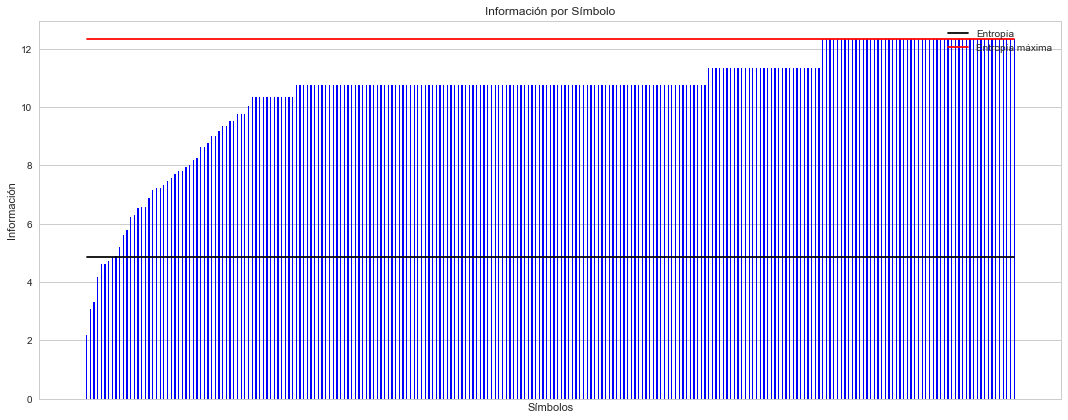

In [76]:
from collections import OrderedDict
informacion = informacion_por_simbolo(S2)
entropia_S2 = entropy(S2)
entropia_maxima_S2 = max_entropy(S2)
informacion = OrderedDict(sorted(informacion.items(), key=lambda x: x[1]))
fig, ax = plt.subplots(figsize=(15, 6))
index, values = map(list, zip(*informacion.items()))
ax.bar(range(253), values, bar_width, color='b')
ax.set_xlabel('Símbolos')
ax.set_ylabel('Información')
ax.set_title('Información por Símbolo')
ax.plot(range(253), [entropia_S2]*253, color='k', label='Entropía')
ax.plot(range(253), [entropia_maxima_S2]*253, color='r', label='Entropía máxima')
ax.legend(loc="upper right")
ax.get_xaxis().set_ticks([])
fig.tight_layout()
plt.show()

A continuacion mostramos un histograma de la informacion de los nodos ordenandolos por su contenido de informacion. A primera vista se puede observar la mayoria de los simbolos fueron observados entre 1 y 3 veces en la muestra con lo cual su contenido de informacion se acerca a la entropia maxima. Para los nodos hacia la izquierda en el histograma podemos ver que su contenido de informacion es bajo pues se registraron muchos paquetes provenientes hacia estos, estos se pueden corresponder con routers o recursos compartidos como por ejemplo impresoras conectadas a la red. 

In [289]:
# ARP message mapping
def getArpHeatmapDataframe(sniffedPackets):
    d = dict()
    for p in sniffedPackets[ARP]:
        if p.psrc not in d.keys():
            d[p.psrc] = dict()
        if p.pdst not in d[p.psrc].keys():
            d[p.psrc][p.pdst] = 0
        d[p.psrc][p.pdst] = d[p.psrc][p.pdst] + 1
    return d

df = pd.DataFrame(getArpHeatmapDataframe(sniffed_packets))

#fix, ax = plt.subplots(figsize=(10, 10))
#sns.heatmap(df, annot=False, robust=True,xticklabels=False, yticklabels=False)
#plt.show()


In [77]:
def create_ARP_df(packets, attrs):
    """
    Aplica el modelo de fuente ARP dado por 'attrs' a 'packets'.
    'attrs' es una lista de campos ARP. Por ejemplo:
        attrs = ['op','psrc']
    """
    cols = defaultdict(list)
    for packet in packets[ARP]:
        for att in attrs:
            try:
                cols[att].append(getattr(packet, att))
            except AttributeError:
                cols[att].append(None)

    return pd.DataFrame(
        data=cols
    )
S2_all_attrs = [
        'hwtype',
        'ptype',
        'hwlen',
        'plen',
        'op',
        'hwsrc',
        'psrc',
        'hwdst',
        'pdst',
]
df = create_ARP_df(sniffed_packets, S2_all_attrs)
df.head(50)

,hwdst,hwlen,hwsrc,hwtype,op,pdst,plen,psrc,ptype
0,00:00:00:00:00:00,6,44:d9:e7:95:64:58,1,1,192.168.1.183,4,192.168.1.1,2048
1,00:00:00:00:00:00,6,44:d9:e7:95:64:58,1,1,192.168.1.183,4,192.168.1.1,2048
2,00:00:00:00:00:00,6,44:d9:e7:95:64:58,1,1,192.168.1.87,4,192.168.1.1,2048
3,ff:ff:ff:ff:ff:ff,6,80:2a:a8:1f:f5:2f,1,1,192.168.1.1,4,192.168.1.6,2048
4,00:00:00:00:00:00,6,44:d9:e7:95:64:58,1,1,192.168.1.87,4,192.168.1.1,2048
5,00:00:00:00:00:00,6,44:d9:e7:95:64:58,1,1,192.168.1.87,4,192.168.1.1,2048
6,00:00:00:00:00:00,6,d0:bf:9c:4f:7d:9e,1,1,192.168.1.164,4,192.168.1.137,2048
7,00:00:00:00:00:00,6,e4:f0:42:8a:93:a6,1,1,192.168.1.237,4,192.168.1.64,2048
8,00:00:00:00:00:00,6,e4:f0:42:8a:93:64,1,1,192.168.1.237,4,192.168.1.84,2048
9,00:00:00:00:00:00,6,e0:ac:cb:74:2e:ea,1,1,192.168.1.164,4,192.168.1.98,2048


In [17]:
import networkx as nx
nodes = df['pdst'].append(df['psrc']).unique()
edges_df = df[['psrc', 'pdst']].drop_duplicates()
edges = [(row['psrc'], row['pdst']) for index, row in edges_df.iterrows() ]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.number_of_nodes()

256

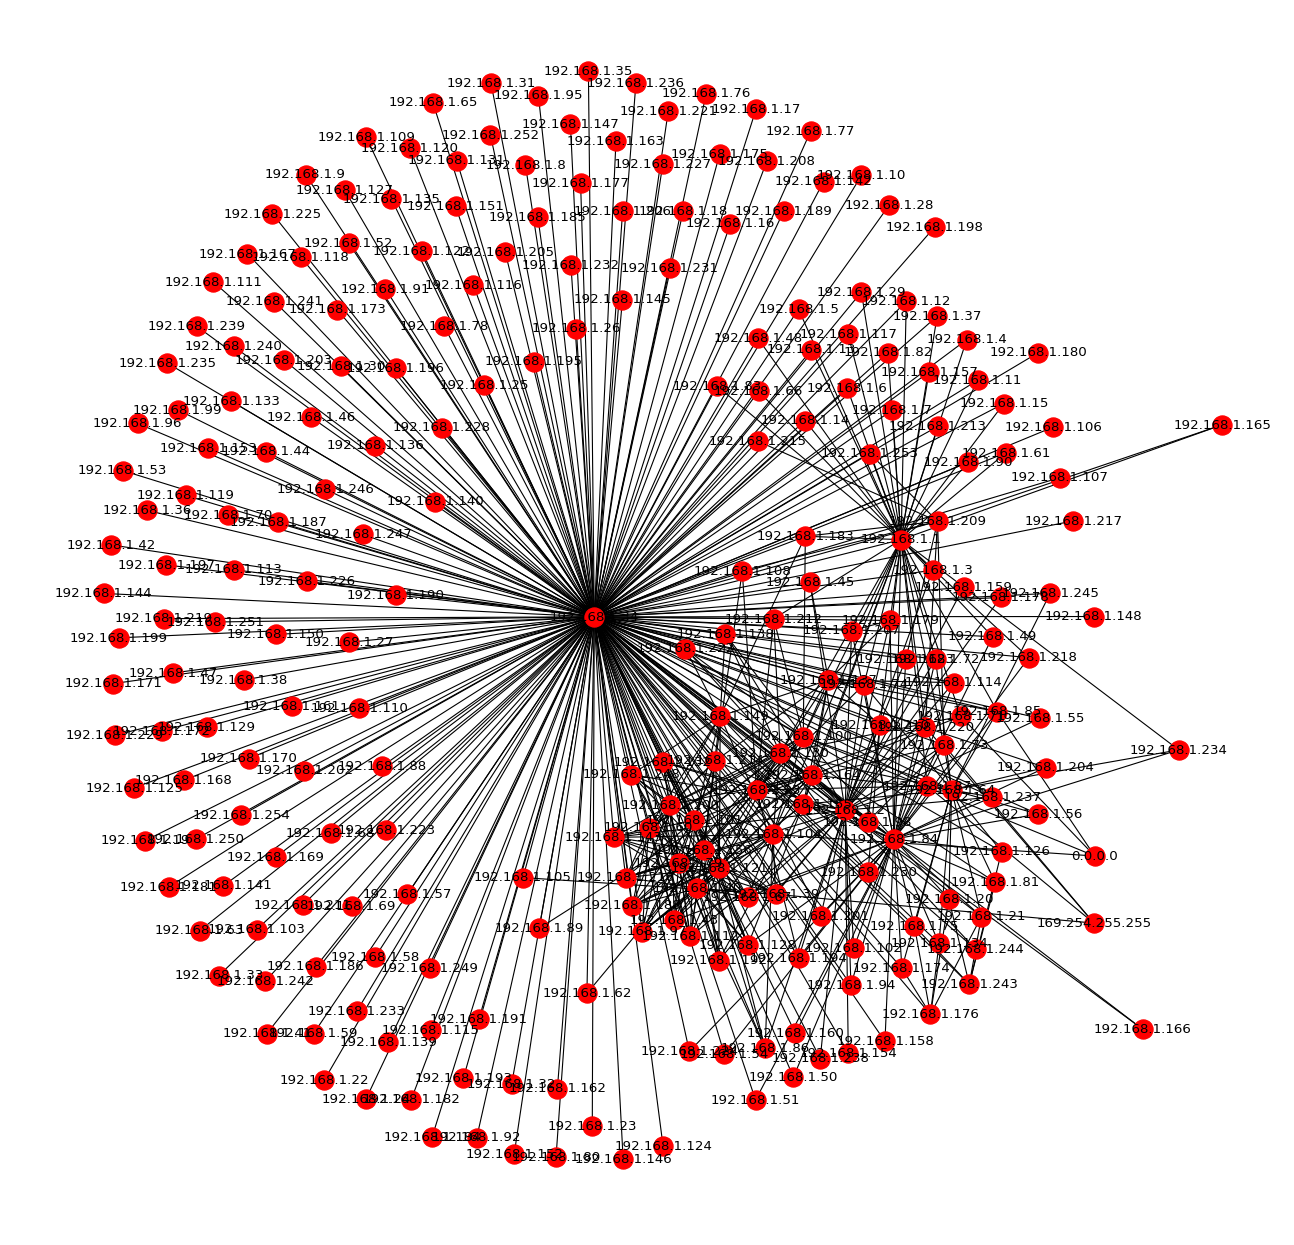

In [115]:
def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    #cut = 1.00
    #xmax = cut * max(xx for xx, yy in pos.values())
    #ymax = cut * max(yy for xx, yy in pos.values())
    #plt.xlim(0, xmax)
    #plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.pdf")


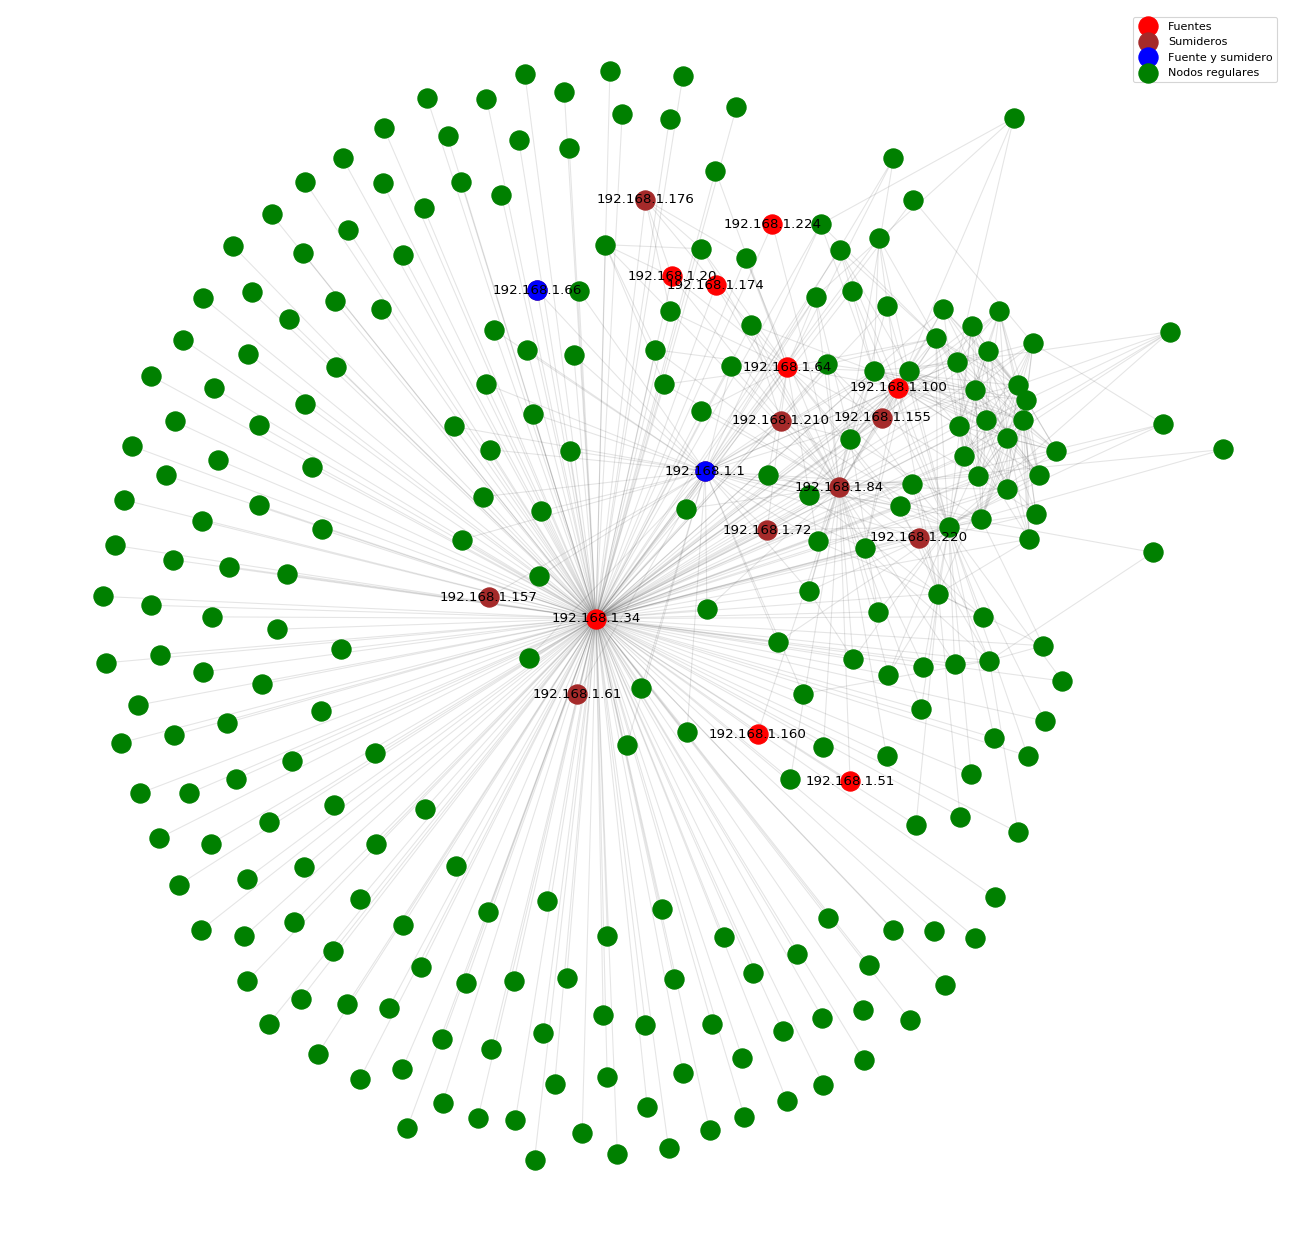

In [64]:
sumideros = df['pdst'].value_counts().index[:10]
fuentes = df['psrc'].value_counts().index[:10]
labels = {}
for node in G.nodes():
    if node in sumideros or node in fuentes:
        #set the node name as the key and the label as its value 
        labels[node] = node

node_color = []
for node in G.nodes():
    if node in sumideros and not node in fuentes:
        #set the node name as the key and the label as its value 
        node_color.append('b')
    elif node in fuentes and not node in sumideros:
        node_color.append('g')
    elif node in ['192.168.1.1', '192.168.1.66']:
        node_color.append('brown')
    else:
        node_color.append('r')

        
fuentes = [f for f in fuentes if f not in sumideros]
sumideros = [f for f in sumideros if f not in fuentes]
fuente_y_sumidero = ['192.168.1.1', '192.168.1.66']
otros = [n for n in G.nodes() if n not in fuentes + sumideros + fuente_y_sumidero]
        
def save_graph(graph,file_name, labels):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=fuentes, node_color='red', label='Fuentes')
    nx.draw_networkx_nodes(G,pos=pos,nodelist=sumideros, node_color='brown', label='Sumideros')
    nx.draw_networkx_nodes(G,pos=pos,nodelist=fuente_y_sumidero, node_color='blue', label='Fuente y sumidero')
    nx.draw_networkx_nodes(G,pos=pos,nodelist=otros, node_color='green', label='Nodos regulares')
    #nx.draw_networkx_nodes(graph,pos, node_color=node_color)
    nx.draw_networkx_edges(graph,pos, alpha=0.1)
    nx.draw_networkx_labels(graph, pos, labels)

    #cut = 1.00
    #xmax = cut * max(xx for xx, yy in pos.values())
    #ymax = cut * max(yy for xx, yy in pos.values())
    #plt.xlim(0, xmax)
    #plt.ylim(0, ymax)
    plt.legend()
    plt.savefig(file_name,bbox_inches="tight")

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.png", labels)

In [51]:
[s for s in sumideros if s in fuentes]

['192.168.1.1', '192.168.1.66']